11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


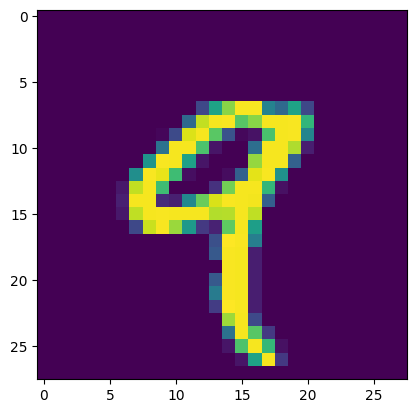

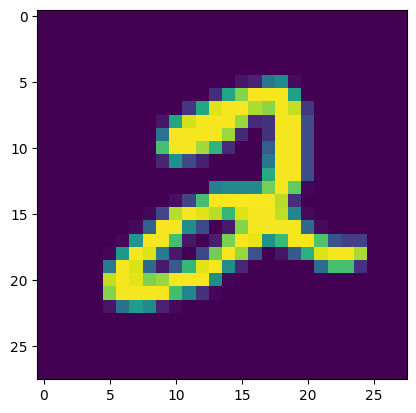

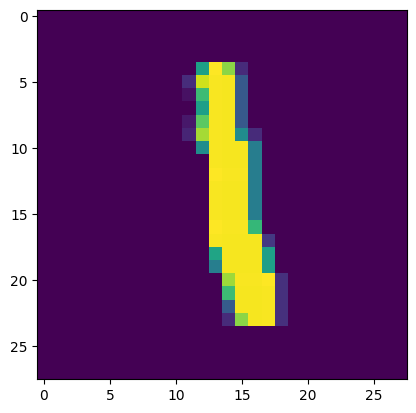

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
from matplotlib import pyplot as plt
plt.imshow(x_train[4])
plt.show()
plt.imshow(x_train[5])
plt.show()
plt.imshow(x_train[6])
plt.show()
#normalise
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)



In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

#Define the model
model=Sequential()
model.add(Dense(64, input_shape=(784,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


#Compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

#Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

#Evaluate the model
loss,accuracy=model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8500 - loss: 0.4943 - val_accuracy: 0.9583 - val_loss: 0.1363
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9600 - loss: 0.1308 - val_accuracy: 0.9658 - val_loss: 0.1045
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9717 - loss: 0.0918 - val_accuracy: 0.9728 - val_loss: 0.0841
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0743 - val_accuracy: 0.9712 - val_loss: 0.0925
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0628 - val_accuracy: 0.9773 - val_loss: 0.0796
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9827 - loss: 0.0523 - val_accuracy: 0.9754 - val_loss: 0.0835
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9859 - loss: 0.0445 - val_accuracy: 0.9751 - val_loss: 0.0840
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9870 - loss: 0.0392 -

In [ ]:
import numpy as np
from PIL import Image

img=Image.open('5.webp').convert('L')
img=img.resize((28,28))
img_array=np.array(img)
img_array=img_array.astype('float32')/255
img_array=img_array.reshape(1,784)
prediction=model.predict(img_array)
predicted_class=np.argmax(prediction)
print('the model predicts the digit is:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
the model predicts the digit is: 7


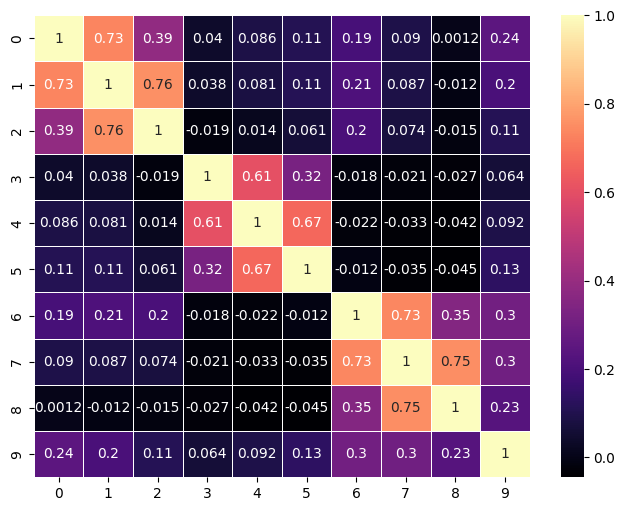

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), _ = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_flat = x_train.reshape(x_train.shape[0], -1)


x_flat = x_flat[:5000]


indices = [300, 301, 302, 310, 311, 312, 400, 401, 402, 411]
labels = [str(i) for i in range(10)]

df = pd.DataFrame(x_flat[:, indices], columns=labels)


corr = df.corr()


corr = corr.loc[labels, labels]


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='magma', linewidths=0.5)

plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1000x800 with 0 Axes>

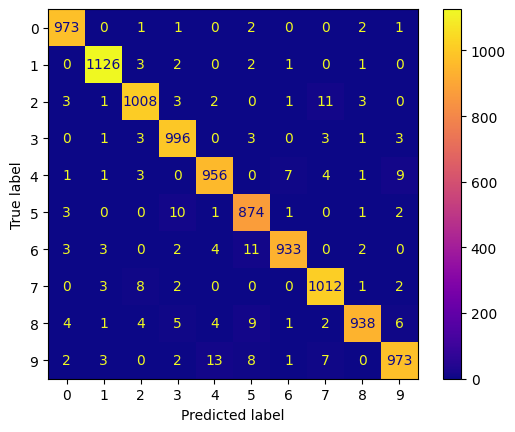

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='plasma', values_format='d')

plt.show()
